In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from src.MM_estimation import estimate_w_factor_loading
from src.ML_estimation import mle_trapz_g_and_w

# Data

In [2]:
# Load the data
grades_data = pd.read_csv('data/grades_hist_pd.csv', sep=';', index_col=0)

for col_name in grades_data.columns:
    grades_data[col_name] = grades_data[col_name] / 100
    
grades_cols = grades_data.columns

In [3]:
grades_data.head()

,AAA,AA,A,BBB,BB,B,CCC/C
Year,,,,,,,
1981,0.0,0.0,0.0000,0.0000,0.0000,0.0233,0.0000
1982,0.0,0.0,0.0021,0.0035,0.0424,0.0318,0.2143
1983,0.0,0.0,0.0000,0.0034,0.0116,0.0470,0.0667
1984,0.0,0.0,0.0000,0.0068,0.0114,0.0349,0.2500
1985,0.0,0.0,0.0000,0.0000,0.0150,0.0653,0.1538


In [4]:
grades_data.mean()

AAA      0.000000
AA       0.000137
A        0.000530
BBB      0.001948
BB       0.008557
B        0.041913
CCC/C    0.249193
dtype: float64

In [5]:
# Assumption every grade has 10000 obligors
n_g_assumption = 3000

In [24]:
for col_name in grades_cols:
    grades_data[str(col_name) + " defaults"] = round(n_g_assumption * grades_data[col_name])

In [25]:
grades_data

,AAA,AA,A,BBB,BB,B,CCC/C,AAA defaults,AA defaults,A defaults,BBB defaults,BB defaults,B defaults,CCC/C defaults
Year,,,,,,,,,,,,,,
1981,0.0,0.0000,0.0000,0.0000,0.0000,0.0233,0.0000,0.0,0.0,0.0,0.0,0.0,70.0,0.0
1982,0.0,0.0000,0.0021,0.0035,0.0424,0.0318,0.2143,0.0,0.0,6.0,10.0,127.0,95.0,643.0
1983,0.0,0.0000,0.0000,0.0034,0.0116,0.0470,0.0667,0.0,0.0,0.0,10.0,35.0,141.0,200.0
1984,0.0,0.0000,0.0000,0.0068,0.0114,0.0349,0.2500,0.0,0.0,0.0,20.0,34.0,105.0,750.0
1985,0.0,0.0000,0.0000,0.0000,0.0150,0.0653,0.1538,0.0,0.0,0.0,0.0,45.0,196.0,461.0
1986,0.0,0.0000,0.0018,0.0034,0.0133,0.0845,0.2308,0.0,0.0,5.0,10.0,40.0,253.0,692.0
1987,0.0,0.0000,0.0000,0.0000,0.0038,0.0313,0.1228,0.0,0.0,0.0,0.0,11.0,94.0,368.0
1988,0.0,0.0000,0.0000,0.0000,0.0105,0.0368,0.2037,0.0,0.0,0.0,0.0,32.0,110.0,611.0
1989,0.0,0.0000,0.0018,0.0061,0.0073,0.0340,0.3333,0.0,0.0,5.0,18.0,22.0,102.0,1000.0


In [26]:
grades_data.iloc[:, -5:].sum(axis=0)

A defaults           62.0
BBB defaults        231.0
BB defaults        1026.0
B defaults         5032.0
CCC/C defaults    29904.0
dtype: float64

# Method of moments estimation

In [28]:
# MM for A, BBB, BB, B, CCC/C
grades_list = ["A", "BBB", "BB", "B", "CCC/C"]
# Call estimate_w_factor_loading function for each grade
num_of_rows = grades_data.shape[0]
n_g_over_time = np.array([n_g_assumption] * num_of_rows)

MM_params = {}
for grade in grades_list:
    MM_params[grade] = estimate_w_factor_loading(grades_data[grade], n_g_over_time, initial_guess=0.45, tolerance=1e-20)
    print(f"Estimated parameters with method of moments for grade {grade}:", MM_params[grade][0], norm.ppf(MM_params[grade][1]))

Estimated parameters with method of moments for grade A: 0.34843028136649823 -3.274097580352716
Estimated parameters with method of moments for grade BBB: 0.31338509068844034 -2.8865426119490847
Estimated parameters with method of moments for grade BB: 0.34959246867789995 -2.3842278912651227
Estimated parameters with method of moments for grade B: 0.3288445137084037 -1.728911139866942
Estimated parameters with method of moments for grade CCC/C: 0.36077988602478867 -0.6770330266259245


In [20]:
MM_params

{'A': (0.34843028136649823, 0.0005299999999999999),
 'BBB': (0.31338509068844034, 0.0019475),
 'BB': (0.34959246867789995, 0.0085575),
 'B': (0.3288445137084037, 0.041912500000000005),
 'CCC/C': (0.36077988602478867, 0.2491925)}

# Maximum likelihood estimation

In [32]:
default_table = grades_data[[grade + " defaults" for grade in grades_list]]
num_of_obligors_table = np.full_like(default_table, n_g_assumption)

In [35]:
# Choose defaults cols from grades_data which is in grades_list
default_table = grades_data[[grade + " defaults" for grade in grades_list]]
num_of_obligors_table = np.full_like(default_table, n_g_assumption)

gamma_init = [norm.ppf(MM_params[grade][1]) for grade in grades_list]
w_init = [MM_params[grade][0] for grade in grades_list]

ml_results = mle_trapz_g_and_w(default_table.values, num_of_obligors_table, w_init, gamma_init)

In [36]:
print("Estimated factor loading parameters with maximum likelihood method:", ml_results[0])
print("Estimated gamma parameters with maximum likelihood method:", ml_results[1])

Estimated factor loading parameters with maximum likelihood method: [0.27608867 0.30129721 0.23455488 0.25864731 0.43168721]
Estimated gamma parameters with maximum likelihood method: [-3.25689612 -2.86605719 -2.37977899 -1.72890077 -0.69089898]


## Fixed w case

In [42]:
ml_fixed_w_results = mle_trapz_g_and_w(default_table.values, num_of_obligors_table, w_init, gamma_init, fixed_w=True)

In [43]:
print("Estimated factor loading parameters with maximum likelihood method:", ml_fixed_w_results[0])
print("Estimated gamma parameters with maximum likelihood method:", ml_fixed_w_results[1])

Estimated factor loading parameters with maximum likelihood method: [0.34843028 0.31338509 0.34959247 0.32884451 0.36077989]
Estimated gamma parameters with maximum likelihood method: [-3.24102731 -2.8700579  -2.35949171 -1.71975599 -0.68755833]


## Fixed gamma case

In [44]:
ml_fixed_gamma_results = mle_trapz_g_and_w(default_table.values, num_of_obligors_table, w_init, gamma_init, fixed_g=True)

In [45]:
print("Estimated factor loading parameters with maximum likelihood method:", ml_fixed_gamma_results[0])
print("Estimated gamma parameters with maximum likelihood method:", ml_fixed_gamma_results[1])

Estimated factor loading parameters with maximum likelihood method: [0.34469652 0.3264662  0.2912969  0.27989679 0.41588174]
Estimated gamma parameters with maximum likelihood method: [-3.27891608 -2.87311566 -2.43443891 -1.75755476 -0.66016817]


In [46]:
ml_fixed_gamma_results[2].fun

2281.0898132475477

## 1 w case

In [55]:
w_1 = [0.3]
ml_1w_results = mle_trapz_g_and_w(default_table.values, num_of_obligors_table, w_1, gamma_init)

In [56]:
print("Estimated factor loading parameters with maximum likelihood method:", ml_1w_results[0])
print("Estimated gamma parameters with maximum likelihood method:", ml_1w_results[1])

Estimated factor loading parameters with maximum likelihood method: [0.34571905]
Estimated gamma parameters with maximum likelihood method: [-3.24083215 -2.85936038 -2.35850189 -1.71412007 -0.68367919]


# Sensitivity analysis for w initial guess

In [67]:
# Change the initial guess for w from 0.05 to 0.25 with step 0.005
w_values = np.round(np.arange(0.15, 0.55, 0.05), 2)
ML_params_for_w = []
for w in w_values:
    temp_res = mle_trapz_g_and_w(default_table.values, num_of_obligors_table, w_1, gamma_init)
    ML_params_for_w.append(temp_res[0][0])

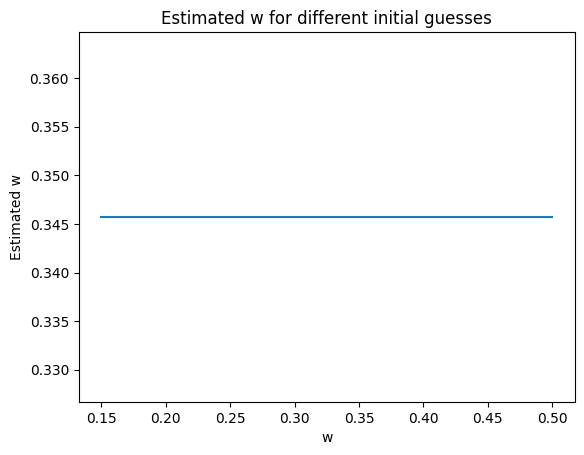

In [68]:
# Plot the results
plt.plot(w_values, ML_params_for_w)
plt.xlabel("w")
plt.ylabel("Estimated w")
plt.title("Estimated w for different initial guesses")
plt.show()